In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

In [2]:
df = pd.read_parquet('clean.parquet')

In [3]:
n, m = df.shape

### Splitting Output from Input Space

In [4]:
X = df.drop('Response', axis= 1) 
y = df['Response']

### Splitting Training and Test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

### Modelling

In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [7]:
# optimization of k hyperparameter
k_values = [i for i in range (1,int(math.sqrt(n)))]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

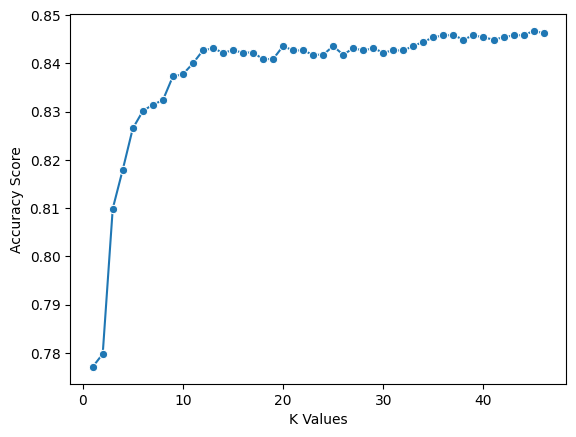

In [8]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [9]:
#Best value for k
best_index = np.argmax(scores)
best_k = k_values[best_index]

In [10]:
knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=45, weights='distance')

In [11]:
y_preds = knn.predict(X_test)

### Evaluation

In [12]:
acc = accuracy_score(y_test, y_preds)
prec = precision_score(y_test, y_preds)
rec = recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)
auc = roc_auc_score(y_test, y_preds)
cm = confusion_matrix(y_preds, y_test, labels=[1,0])
print(cm)

[[  9   6]
 [ 55 375]]


In [13]:
print("Accuracy: %.4f" % acc)
print("Precision: %.4f" % prec)
print("Recall: %.4f" % rec)
print("F1: %.4f" % f1)
print("AUC: %.4f" % auc)

Accuracy: 0.8629
Precision: 0.6000
Recall: 0.1406
F1: 0.2278
AUC: 0.5624
